In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset

from google.colab import files


uploaded = files.upload()

column_names = [f'feature_{i}' for i in range(57)] + ['label']  # 57 features and 1 target label
df = pd.read_csv('/content/spambase.data', header=None, names=column_names)

# Display basic information about the dataset
print(df.head())
print(df.info())
print(df['label'].value_counts())  # Check the distribution of spam (1) and non-spam (0)


Saving spambase.data to spambase (2).data
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0       0.00       0.00       0.00       0.00  ...        0.00       0.000   
1       0.21       0.07       0.00       0.94  ...        0.00       0.132   
2       0.19       0.12       0.64       0.25  ...        0.01       0.143   
3       0.31       0.63       0.31       0.63  ...        0.00       0.137   
4       0.31       0.63       0.31       0.63  ...        0.00       0.135   

   feature_50  feature_51  feature_52  feature_53  feature_54 

In [ ]:
X = df.drop(columns=['label'])
y = df['label']

print(X.isnull().sum().sum(), "missing values in the dataset.")


0 missing values in the dataset.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (3680, 57)
Testing set size: (921, 57)


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [[-2.01413972e-01 -1.31673019e-01  1.59358385e-01  6.70852971e-01
   6.42505131e-01  5.98181853e-01  2.24856940e+00  5.54441526e-01
   6.55655455e-01  9.50666853e-02 -3.67369790e-01 -9.77005340e-02
   2.93683679e-02  8.64853486e-02  1.24509404e+00  1.03071286e+00
   8.65593146e-01  7.72591251e-02  9.41466081e-02  9.59730496e-01
   2.48381131e-01  2.55542539e-01  2.50825600e+00  3.84728020e-01
  -1.88051250e+00 -8.11899578e-01 -4.22189415e+00  3.22045946e-01
  -1.23910450e+00 -7.03901722e-01 -2.83705000e-01 -6.69261143e-02
  -1.28385659e+00 -3.38853034e-03 -8.33226753e-01  1.12669052e+00
  -5.35002267e-02 -5.63291026e-01 -8.86956119e-01 -7.67278792e-02
  -1.04398420e+00 -1.66504018e+00 -7.53302638e-01 -1.89446253e+00
  -6.81178425e-01 -1.35269584e+00 -4.49613340e-01 -1.46480539e+00
  -1.07969253e+00 -2.34999338e-01 -2.65213006e-01  2.42466371e-01
   3.39733874e+00  9.61112762e-01 -1.14800489e-02  6.88393306e-03
   8.75907402e-04]]
Intercept: [-1.51837801]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9218241042345277


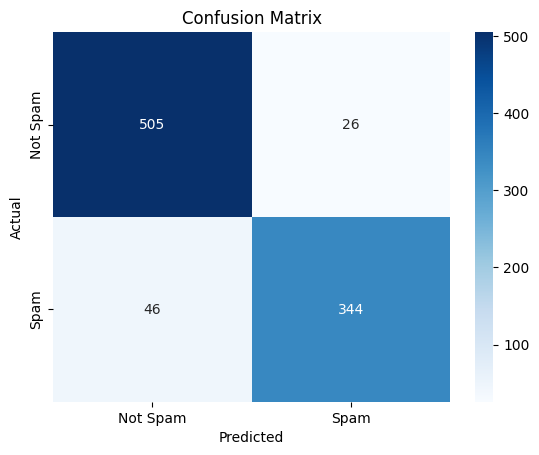

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.92      0.95      0.93       531
        Spam       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print("Classification Report:\n", report)
